# Rachit Pandya
## Task - 1
### Linear Regression With SKlearn
#### I used Scikit-Learn library for machine learning to implement regression functions.

### Linear Regression
This task predicts the student's percentage of marks based on their hours of study.

In [ ]:
# Let's Import the modules that is required to perform numerical, data manipulation and visulaization.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Let's get the Data from the web (Data Acquisition)
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data gathered successfully")

data.tail(10)

Data gathered successfully


,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


Since the data contains two columns it looks like there's a relationship between data points so plotting a 2-D graph can revel the type of relationship.

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


** Between the various scores let's do some analysis and devide the scores into two categories to understand the scores batter**

<ipython-input-4-4524b4925f69>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette=colors)


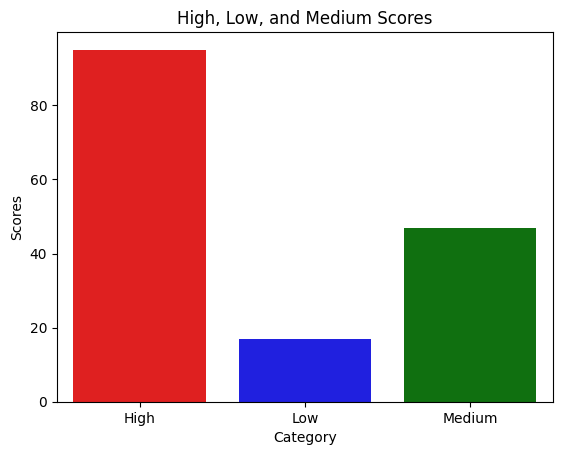

In [ ]:

# Calculate high, low, and medium values
high_val = np.max(data['Scores'])
low_val = np.min(data['Scores'])
med_val = np.median(data['Scores'])

# Create a DataFrame
df = pd.DataFrame({'Category': ['High', 'Low', 'Medium'],
                   'Value': [high_val, low_val, med_val]})

# Define colors for each category
colors = {'High': 'red', 'Low': 'blue', 'Medium': 'green'}

# Plot using Seaborn
sns.barplot(x='Category', y='Value', data=df, palette=colors)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Scores')
plt.title('High, Low, and Medium Scores')

# Show the plot
plt.show()

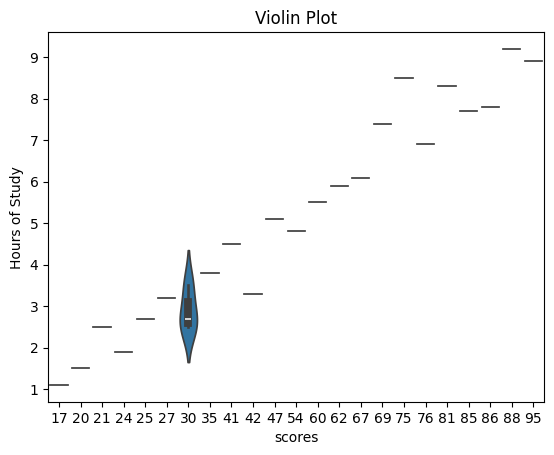

In [ ]:
#violin plot
import seaborn as sns
sns.violinplot(x=data['Scores'], y=data['Hours'])
plt.xlabel('scores')
plt.ylabel('Hours of Study')
plt.title('Violin Plot')
plt.show()

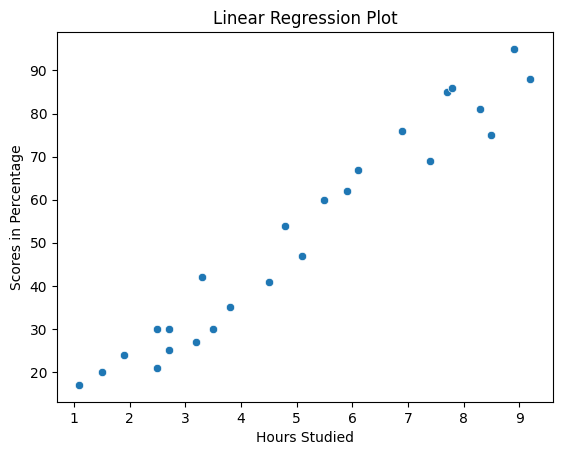

In [ ]:
# Using seaborn library's functions to plot the graph
sns.scatterplot(x='Hours', y='Scores', data=data)  # scatter_kws to control marker size
plt.xlabel('Hours Studied')
plt.ylabel('Scores in Percentage')
plt.title('Linear Regression Plot')
plt.show()

**Above plot revels that there's a clear linear relationship between hours studied by student and scores that achieved by them. So we can choose linear regression model.**

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

### In order to get the prediction and use the ML Model it is neccessary to get the training and testing data from original data in Supervised Learning Model.
#### Hence with the help of SKlearn's train_test_split() method the data is divided into

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

#### After Spliting the data into 80% - 20% we will train our model with training data.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training completed.")

Training completed.


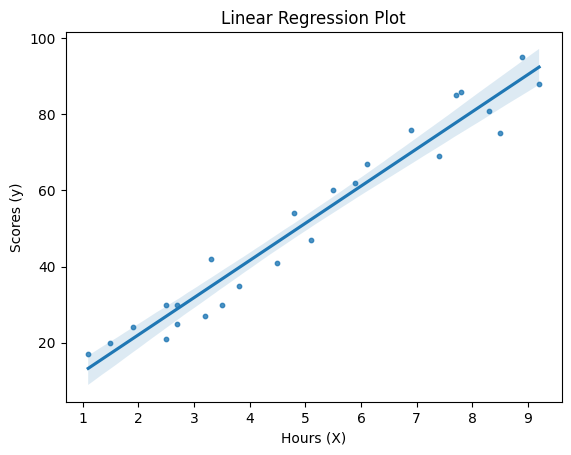

In [ ]:
# Scatter plot with regression line
sns.regplot(x=X, y=y, scatter_kws={'s': 10})  # scatter_kws to control marker size

plt.xlabel('Hours (X)')
plt.ylabel('Scores (y)')
plt.title('Linear Regression Plot')
plt.show()

**Let's make the predictions**

In [ ]:
# After fiting training data into our model, it is now ready to predict the output scores
y_pred = regressor.predict(X_test)

In [ ]:
# Let's compare the Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# Let's test our model with own input data
hours = np.array([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


** It's time check the accuracy of the model and prediction**

In [ ]:
#There are many evualting metrics to check the accuracy of the model. Here we are using the root mean squared error metrics.
from sklearn import metrics
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.647447612100373
